We will start by importing all required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageFilter
import torch

from PIL import JpegImagePlugin
JpegImagePlugin._getmp = lambda x: None

We can now start by importing a single real-life image

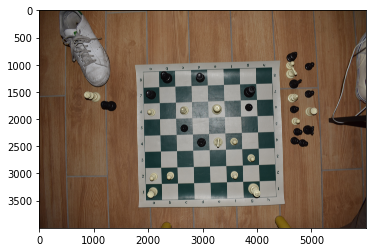

In [2]:
image = Image.open(
    "Original/1q1r4-r5k1-P1B1Q1p1-2p5-3bNP2-6P1-PP3P2-R5K1.JPG")
image_arr = np.array(image)
plt.imshow(image_arr)

We will now proceed to define a function that converts an image's FEN notation into a vector where entry 1 represents a1, entry 2 represents a2, ..., entry 9 represents b1, ..., and entry 64 represents h8 (Column by column). Furthermore, we defined that the following convention applies to piece labels: 
- Empty: 0
- White pawn: 1
- White knight: 2
- White bishop: 3
- White rook: 4
- White queen: 5
- White king: 6
- Black pawn: 7 
- Black knight: 8
- Black bishop: 9
- Black rook: 10
- Black queen: 11
- Black king: 12

The function will basically an FEN notation string to a size 64 vector representing the position, and can be found in the preprocessing_utils file.

Now that we have a function to convert any FEN label to a vector as required, we can use the library defined at https://github.com/Elucidation/ChessboardDetect to crop the images to the frame of the board. Please note that we will split the training data into squares before-hand to speed up training, while testing will be done with the uncropped images in order to simulate a real-life situation.

In [4]:
%%capture

from preprocessing_utils import *

# The directory where the pre-processed data will be saved
target_dir = "../../Datasets/Real Life Data/"

# The directory where the original unprocessed data is stored
original_dir = "./Original/"

# Initialize empty tensors for y array (labels)
y_real_life = torch.Tensor(())

# Iterate over the real life images
for i, filename in enumerate(os.listdir(original_dir)):

    # Remove the .JPG extension to get the FEN noation
    fen = filename.split('.')[0] 

    # Convert the FEN notation to a vector
    vector = fen_to_vector(fen)
    # Extract the squares by warping the image and cropping it
    warped_image = warp_image(original_dir + filename)
    squares = crop_individual_squares(warped_image)

    y_real_life = torch.cat((y_real_life, torch.tensor(vector,  dtype = torch.long)))

    # Represent the whole position as a single numpy array
    for j in range(64):
        img = squares[j]

        # Create PIL image object from RGB array
        image = Image.fromarray(img)
        # Convert to RGB color space, remove alpha channel
        image = image.convert('RGB')
        # Save the image in the new folder
        image.save(target_dir+'EX_%06d' % (i*64+j) + '.png')
    
torch.save(y_real_life, target_dir+'y_real_life.pt')

We can now visualize square 49 from example 9 as follows:

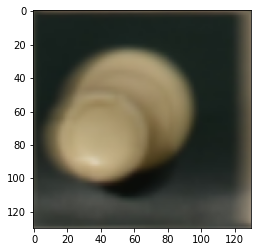

In [6]:
# Load the image
img = Image.open(target_dir+'EX_000000.png')

# Plot the image:
plt.imshow(img)

